In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


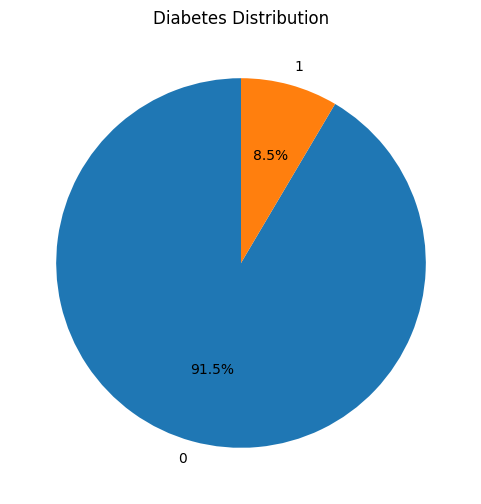

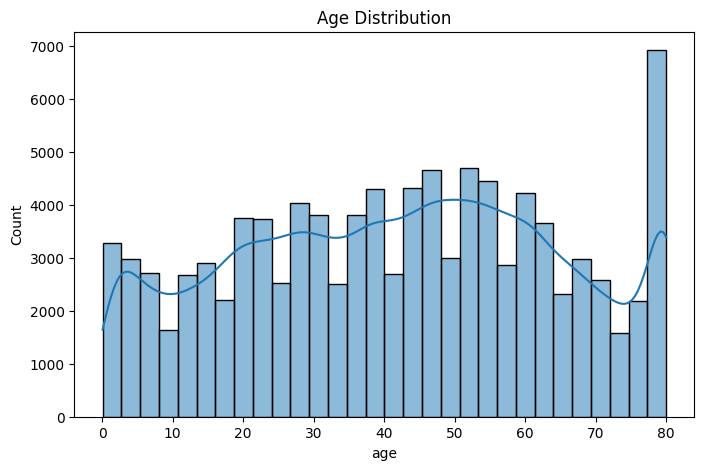

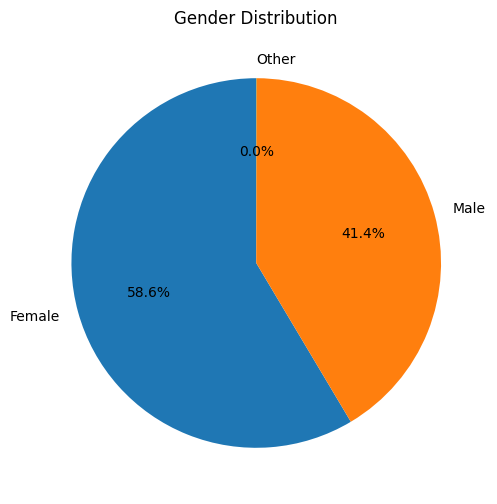

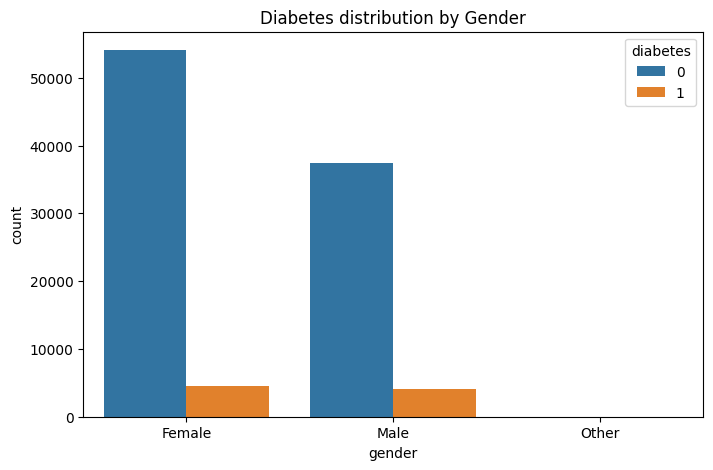

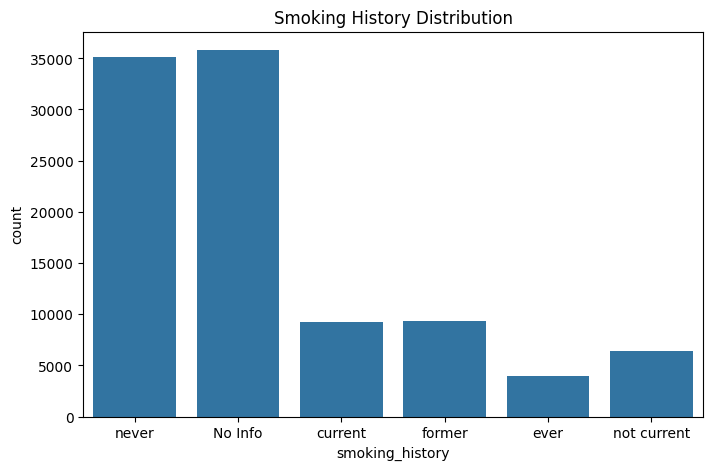

['never' 'No Info' 'current' 'former' 'ever' 'not current']
[1 0 4 2 5 3]
['Female' 'Male' 'Other']
[0 1 2]


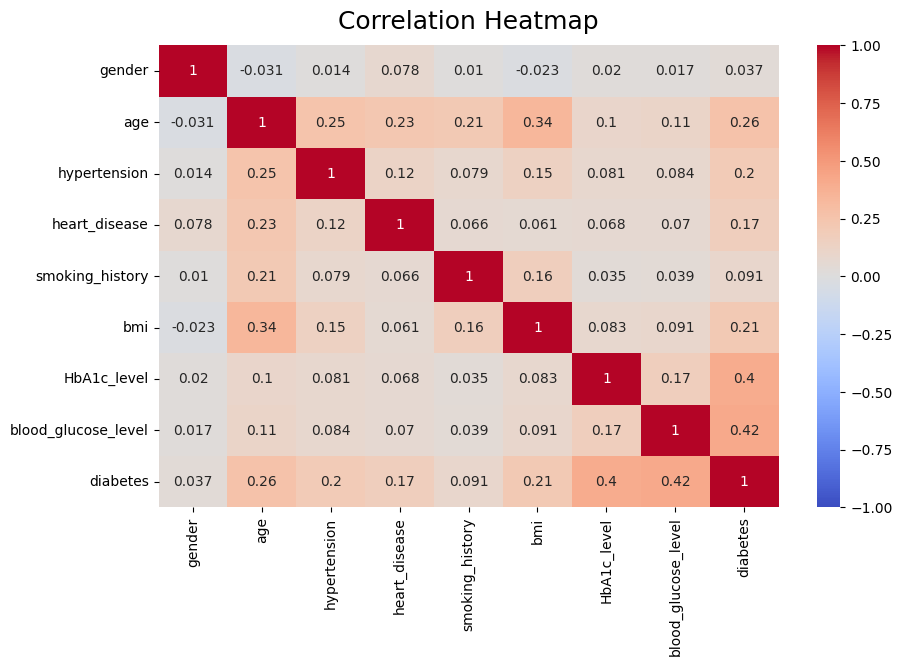

In [ ]:
%run '/content/drive/MyDrive/BTL/Introdution.ipynb'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
df_encoded = df.copy()

# Handle missing values
df_encoded.fillna(method='ffill', inplace=True)

# Encode categorical columns to numerical values
columns_to_encode = ['gender', 'smoking_history']
label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select X and y
X = df_encoded.drop(columns=['diabetes'])  # Drop the target column
y = df_encoded['diabetes']                # Target column

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-27-66e3fabb9634>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_encoded.fillna(method='ffill', inplace=True)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the ANN model
model = Sequential()

# Input and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Add additional hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Building model
model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))

model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Training model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)


Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9402 - loss: 0.1735 - val_accuracy: 0.9650 - val_loss: 0.1027
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9651 - loss: 0.1055 - val_accuracy: 0.9690 - val_loss: 0.0915
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9659 - loss: 0.0996 - val_accuracy: 0.9701 - val_loss: 0.0885
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9699 - loss: 0.0898 - val_accuracy: 0.9706 - val_loss: 0.0865
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9687 - loss: 0.0911 - val_accuracy: 0.9689 - val_loss: 0.0877
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9695 - loss: 0.0886 - val_accuracy: 0.9706 - val_loss: 0.0861
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9712 - loss: 0.0847 - val_accuracy: 0.9709 - val_loss: 0.0852
Epoch 8/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9717 - loss: 0.08

In [ ]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9717 - loss: 0.0820
Test Accuracy: 97.19%


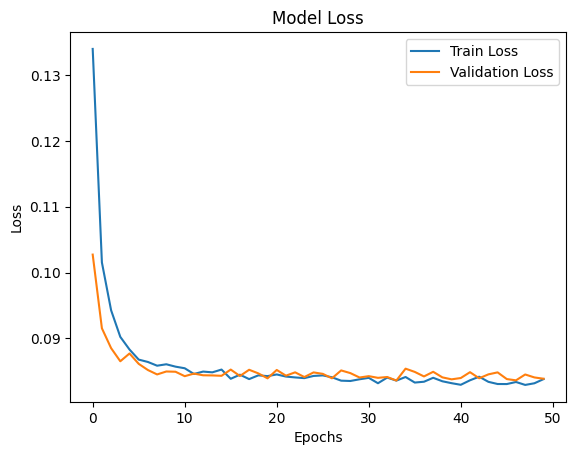

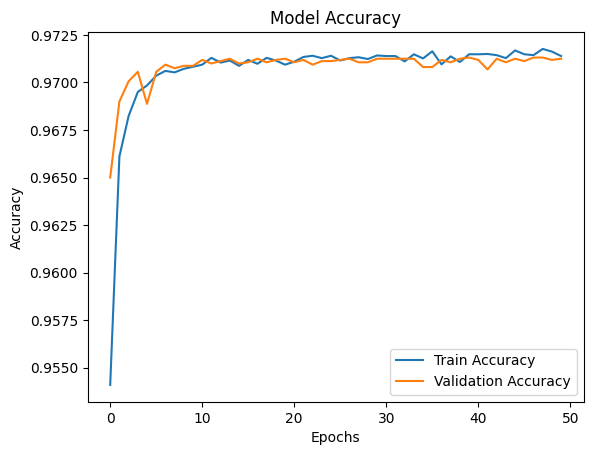

In [ ]:
import matplotlib.pyplot as plt

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Prediction
y_pred = (model.predict(X_test) > 0.5).astype('int32')

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       1.00      0.67      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

